### importing libraries



In [24]:
import pandas as pd
import numpy as np
import sklearn

### Loading dataset


In [25]:
path="C:\\Users\\catiq\\OneDrive\\Documents\\Downloads\\archive\\boston.csv"
df=pd.read_csv(path)

In [26]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


### Exploring dataset

In [27]:
df.head(1)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.09,1,296.0,15.3,396.9,4.98,24.0


In [28]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


#### checkng null values

In [29]:
df.isna().sum()   #don't have any null values

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

### EDA(Exploratory data analysis)

In [30]:
import matplotlib.pyplot as plt

#### Strong positive corelation

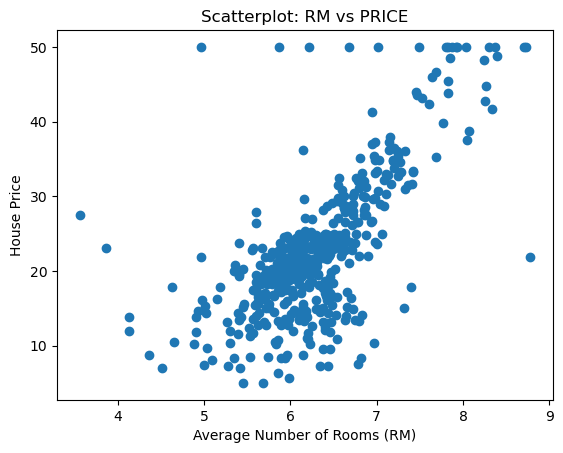

In [31]:


plt.scatter(df['RM'], df['MEDV'])  # Rooms and price
plt.xlabel("Average Number of Rooms (RM)")
plt.ylabel("House Price")
plt.title("Scatterplot: RM vs PRICE")
plt.show()

#### not a good relaiton

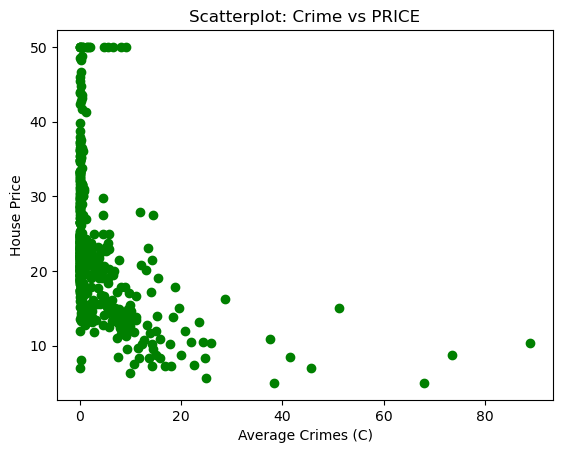

In [32]:
plt.scatter(df['CRIM'], df['MEDV'],c="g")  #crime rate and price 
plt.xlabel("Average Crimes (C)")
plt.ylabel("House Price")
plt.title("Scatterplot: Crime vs PRICE")
plt.show()

#### strong negative correlation

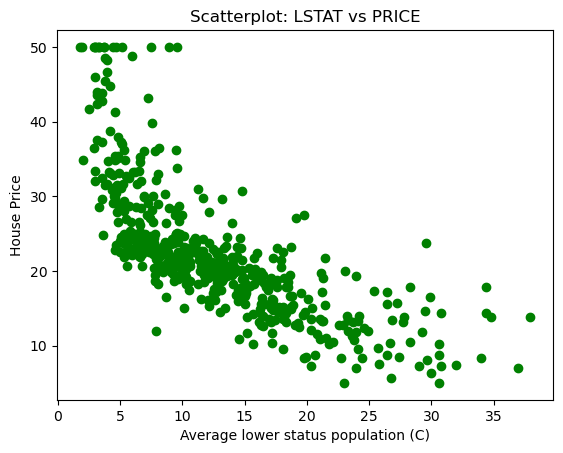

In [33]:
plt.scatter(df['LSTAT'], df['MEDV'],c="g")  #crime rate and price 
plt.xlabel("Average lower status population (C)")
plt.ylabel("House Price")
plt.title("Scatterplot: LSTAT vs PRICE")
plt.show()

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt

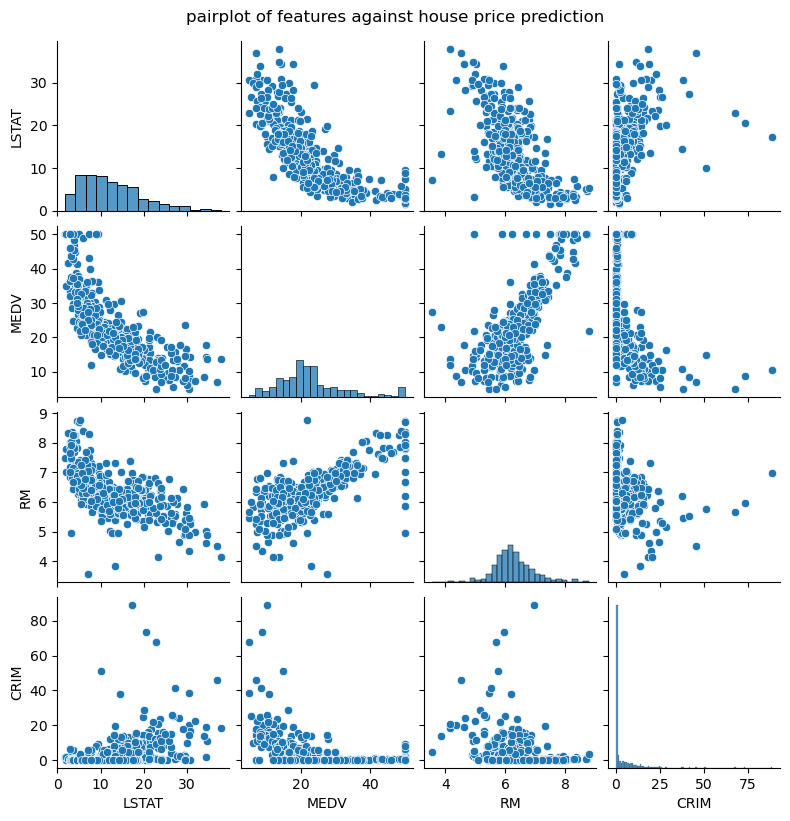

In [35]:
sns.pairplot(df[['LSTAT','MEDV','RM','CRIM']],height=2)
plt.suptitle('pairplot of features against house price prediction',y=1.02)
plt.show()

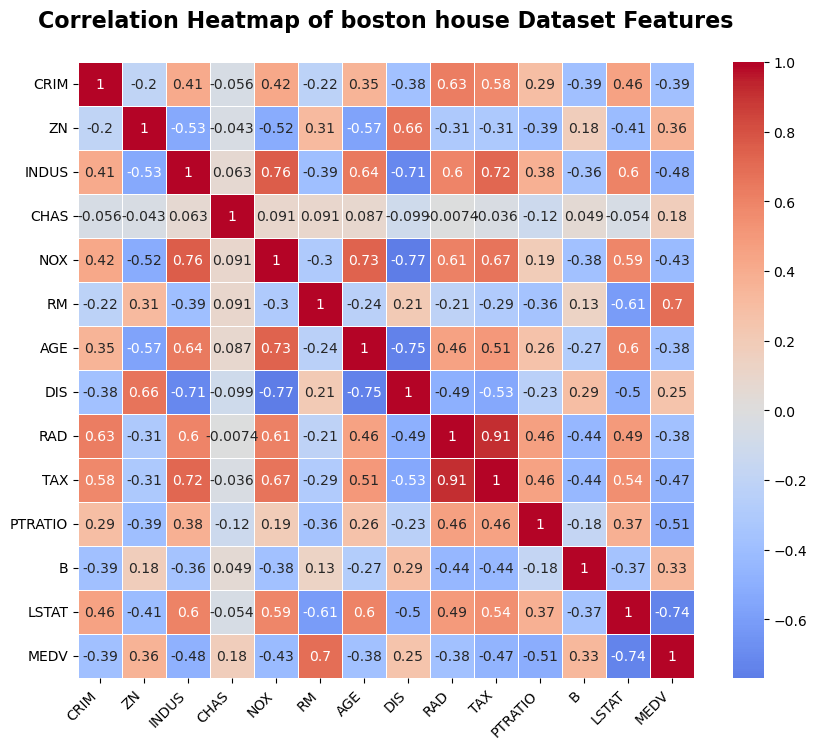


Correlation with House Price (PRICE):
MEDV       1.000000
LSTAT      0.737663
RM         0.695360
PTRATIO    0.507787
INDUS      0.483725
TAX        0.468536
NOX        0.427321
CRIM       0.388305
RAD        0.381626
AGE        0.376955
ZN         0.360445
B          0.333461
DIS        0.249929
CHAS       0.175260
Name: MEDV, dtype: float64


In [36]:
# Calculate correlation matrix
corr = df.corr()

# Create the heatmap
plt.figure(figsize=(10, 8))
heatmap = sns.heatmap(corr,  annot=True, cmap='coolwarm', 
                      center=0, square=True, linewidths=0.5,
                      )

# Customize the plot
plt.title('Correlation Heatmap of boston house Dataset Features\n', fontsize=16, fontweight='bold')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.show()


# Show just the correlations with PRICE (house price)
print("\nCorrelation with House Price (PRICE):")
print("=====================================")
print(corr['MEDV'].abs().sort_values(ascending=False))





### Train Test Split 

In [37]:
from sklearn.model_selection import train_test_split

In [38]:
X=df.drop(columns='MEDV',axis=1)
y=df['MEDV']

In [39]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

In [40]:
print(f" shape of X_train is {X_train.shape}\n shape of y_train is {y_train.shape}\n shape of X_test is {X_test.shape}\n shape of y_test is {y_test.shape}")

 shape of X_train is (354, 13)
 shape of y_train is (354,)
 shape of X_test is (152, 13)
 shape of y_test is (152,)


### Model training

In [41]:
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression()

### Make predictions

In [42]:
predictions=regressor.predict(X_test)
print(f"predictions are:{predictions[0:10]}")

predictions are:[28.64896005 36.49501384 15.4111932  25.40321303 18.85527988 23.14668944
 17.3921241  14.07859899 23.03692679 20.59943345]


In [43]:
y_test[0:10]

173    23.6
274    32.4
491    13.6
72     22.8
452    16.1
76     20.0
316    17.8
140    14.0
471    19.6
500    16.8
Name: MEDV, dtype: float64

### Model prediction plot

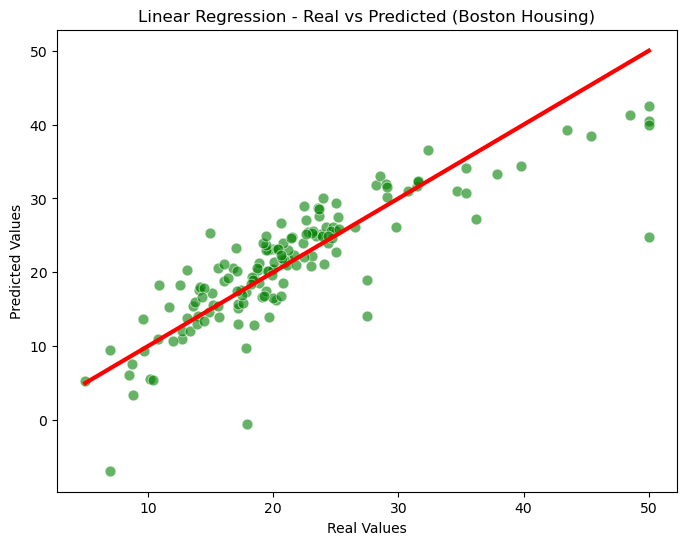

In [50]:
# Plot real vs predicted
plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test, y=predictions, color="green", alpha=0.6, s=60)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r', lw=3)  # ideal fit line
plt.xlabel("Real Values")
plt.ylabel("Predicted Values")
plt.title("Linear Regression - Real vs Predicted (Boston Housing)")
plt.show()

### Evaluate model

In [44]:
from sklearn.metrics import r2_score,mean_squared_error
MSE=mean_squared_error(y_test,predictions)

In [45]:
print(f"Mean square error is {MSE}")

Mean square error is 21.51744423117734


### Model accuracy

In [53]:
Accuracy=regressor.score(X_test,y_test)
print(f"model's accuracy is: {Accuracy}")

model's accuracy is: 0.7112260057484915
